In [ ]:
Medical insurance cost prediction

workflow: 
1. Data collection
2. Data analysis
3. Data pre processing
4. Train test split
5. predict using linear regression model
6. model evaluation

In [100]:
# libraries needed
import numpy as np # numpy arrays
import pandas as pd # pandas Dataframe
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization 
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

 Data collection and analysis

In [101]:
# loading dataset into pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [102]:
# first 5 rows of datafram
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
# 5 columns for training and 1 target column

In [104]:
insurance_dataset.shape

(1338, 7)

In [105]:
# get some info about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
# check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [107]:
# no missing values

In [108]:
# statistical measures of datset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


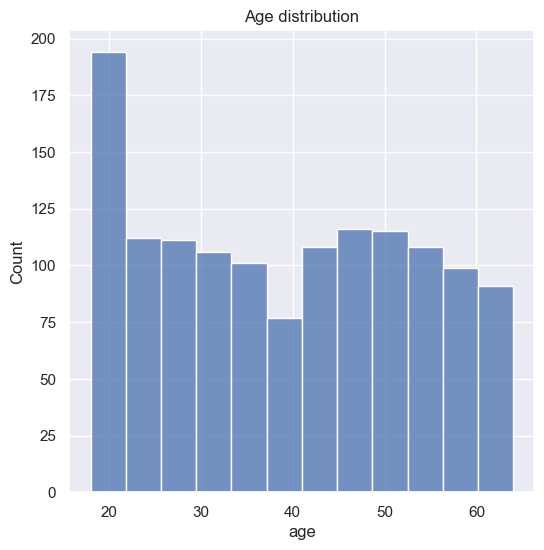

In [109]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

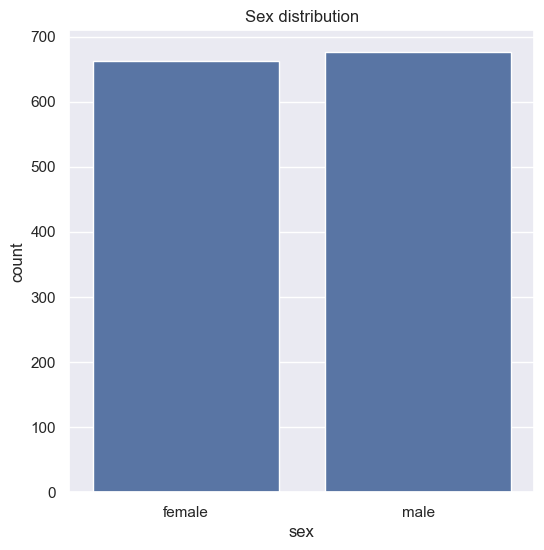

In [110]:
# distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [111]:
# Sex distribution is good in dataset

In [112]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

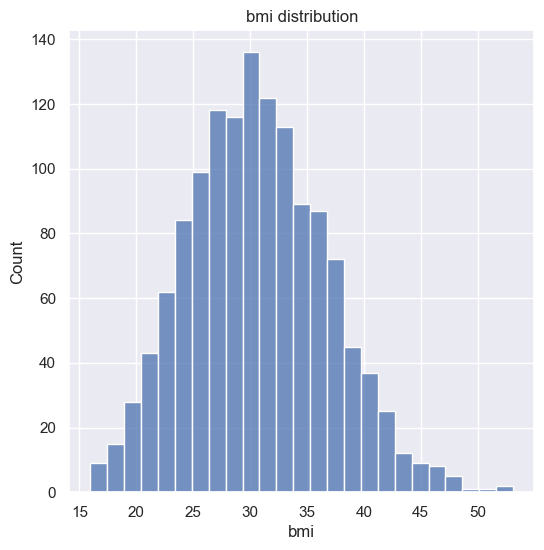

In [113]:
# bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

Normal bmi  range --> 18.5 to 24.9. looking at graph, most people are overweight resulting in higher insurance

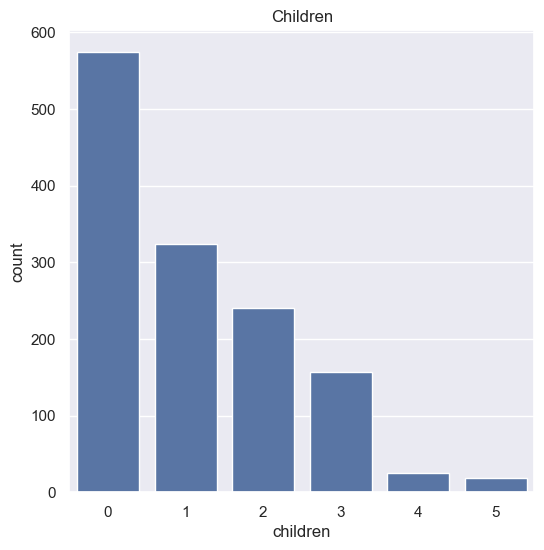

In [114]:
# children column 
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [115]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

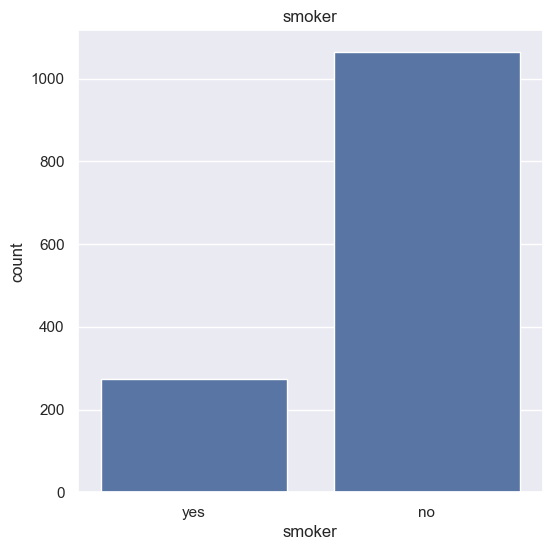

In [116]:
# smokers column 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [117]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

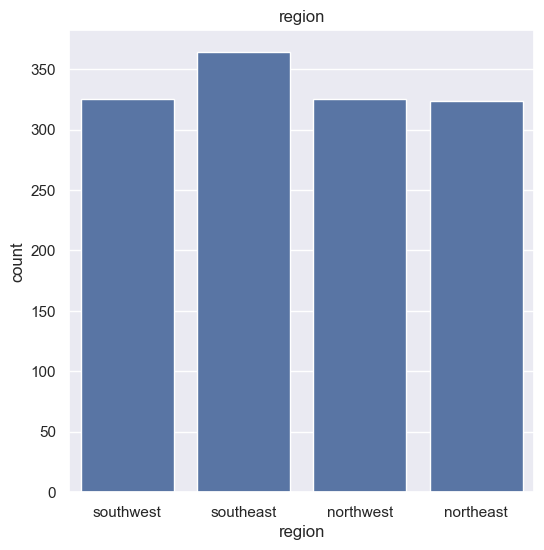

In [118]:
# region column 
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [119]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

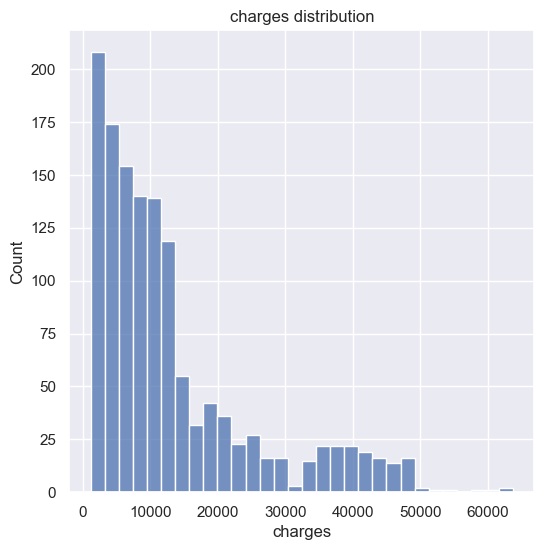

In [120]:
# distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

Data pre processing

In [121]:
# need to encode categorical features into binary classification

In [122]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1,'northeast':3,'northwest':4,}},inplace=True)

train test split

In [123]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [124]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       4
4      32    0  28.880         0       1       4
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       4
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       4

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [125]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [126]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training

In [127]:
# Linear regression
lin_regressor = LinearRegression()

In [128]:
lin_regressor.fit(X_train, Y_train)

LinearRegression()

In [129]:
# Linear regression model evaluation on training data
training_data_prediction = lin_regressor.predict(X_train)

In [130]:
# model evaluation using R squared on training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value for Linear regression model on training data: ', r2_train)

R squared value for Linear regression model on training data:  0.7516293812348264


In [131]:
# Linear regression model evaluation on test data
test_data_prediction = lin_regressor.predict(X_test)

In [132]:
# model evaluation using R squared on test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value for Linear regression model on test data: ', r2_test)

R squared value for Linear regression model on test data:  0.7449941035110836


In [133]:
# XGBRegressor 

In [134]:
xgb_regressor = xgb.XGBRegressor()

In [135]:
xgb_regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [136]:
# XGBRegressor model evaluation on training data
training_data_prediction = xgb_regressor.predict(X_train)

In [137]:
# XGBRegressor model evaluation using R squared on training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value for XGBRegressor model on training data: ', r2_train)

R squared value for XGBRegressor model on training data:  0.9967362176093564


In [138]:
# Linear XGBRegressor model evaluation on test data
test_data_prediction = xgb_regressor.predict(X_test)

In [139]:
# XGBRegressor model evaluation using R squared on test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value for XGBRegressor model on test data: ', r2_test)

R squared value for XGBRegressor model on test data:  0.8144316777193814


In [140]:
input_data = (18,1,38.665,2,1,3)
# actual price 3393.35635

# changing input_data to a numpy array
input_data_nparray = np.asarray(input_data)

# reshape array
input_data_reshaped = input_data_nparray.reshape(1,-1)

prediction = xgb_regressor.predict(input_data_reshaped)
print('The insurance cost is $', prediction[0])

The insurance cost is $ 17008.074
